In [507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import normaltest
sns.set_theme(style="ticks", color_codes=True)

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [508]:
df = pd.read_csv('/home/nadiera/Downloads/HETMIS_20210723.csv')#),parse_dates=['ENROL_DATE'])
df.head()

LEARNER_ID DATE_OF_BIRTH   EQUITY DISABILITY  GENDER HOME_LANGUAGE  \
0         306     11/DEC/72  African       None  Female       seSotho   
1         310     24/OCT/67  African       None  Female       English   
2         318     14/JAN/67  African       None    Male      xiTsonga   
3         324     06/AUG/66  African       None  Female      isiXhosa   
4         328     01/JUN/68  African       None  Female       seSotho   

    NATIONALITY RESIDENT_STATUS       LEARNER_PROVINCE ENROL_STATUS  ...  \
0  South Africa    South Africa                Gauteng     Enrolled  ...   
1  South Africa    South Africa             North West     Achieved  ...   
2  South Africa    South Africa                Limpopo     Achieved  ...   
3  South Africa    South Africa           Eastern Cape     Enrolled  ...   
4  South Africa    South Africa  South Africa National     Enrolled  ...   

  ENROL_DATE ENROL_STATUS_DATE                           PROVIDER_NAME  \
0  05/JAN/10         05/JAN/10        Tshwane University of Technology   
1  01/JAN/08         01/DEC/12                   North West University   
2  04/JAN/10         01/DEC/11                   University of Limpopo   
3  31/JAN/04         31/JAN/04  Nelson Mandela Metropolitan University   
4  27/MAR/08         27/MAR/08              University of South Africa   

  QUALIFICATION_ID                                QUALIFICATION_TITLE  \
0              332  BACCALAUREUS EDUCATION: (HONS): (FET): SPECIAL...   
1             6394  ADVANCED CERTIFICATE IN EDUCATI / GEVORDERDE O...   
2             3082        BACHELOR OF AGRICULTURAL MANAGEMENT HONOURS   
3             7203                    OCCASIONAL STUDIES : MANAGEMENT   
4             7040                                NON-DEGREE PURPOSES   

   NQF_LEVEL    QUALIFICATION_TYPE CREDITS_TOTAL  LOAD_SUPPLIER REPORT_YEAR  
0    Level 7        Honours Degree             0          HEMIS        2010  
1    Level 5  National Certificate             0          HEMIS        2012  
2    Level 7        Honours Degree             0          HEMIS        2011  
3  Undefined               Unknown             0          HEMIS        2004  
4  Undefined               Unknown             0          HEMIS        2008  

[5 rows x 21 columns]

In [509]:
df.isnull().sum()

LEARNER_ID                0
DATE_OF_BIRTH            11
EQUITY                    0
DISABILITY                0
GENDER                    0
HOME_LANGUAGE             0
NATIONALITY               0
RESIDENT_STATUS           0
LEARNER_PROVINCE          0
ENROL_STATUS              0
ENROL_TYPE                0
ENROL_DATE             5980
ENROL_STATUS_DATE         0
PROVIDER_NAME             0
QUALIFICATION_ID          0
QUALIFICATION_TITLE       0
NQF_LEVEL                 0
QUALIFICATION_TYPE        0
CREDITS_TOTAL             0
LOAD_SUPPLIER             0
REPORT_YEAR               0
dtype: int64

In [510]:
df=df.dropna(how='any',axis=0) 

In [511]:
df.isnull().sum()

LEARNER_ID             0
DATE_OF_BIRTH          0
EQUITY                 0
DISABILITY             0
GENDER                 0
HOME_LANGUAGE          0
NATIONALITY            0
RESIDENT_STATUS        0
LEARNER_PROVINCE       0
ENROL_STATUS           0
ENROL_TYPE             0
ENROL_DATE             0
ENROL_STATUS_DATE      0
PROVIDER_NAME          0
QUALIFICATION_ID       0
QUALIFICATION_TITLE    0
NQF_LEVEL              0
QUALIFICATION_TYPE     0
CREDITS_TOTAL          0
LOAD_SUPPLIER          0
REPORT_YEAR            0
dtype: int64

In [512]:
df = df.loc[df['QUALIFICATION_TYPE'].str.startswith('Doctoral Degree')].copy() #I copied the original DataFrame to create a Subset DataFrame of only PhD/Doctoral Studends
df

LEARNER_ID DATE_OF_BIRTH    EQUITY                DISABILITY  GENDER  \
19              416     16/SEP/62     White  Disabled but unspecified    Male   
22              430     25/JUN/60   African                      None    Male   
27              604     28/JUN/70     White                      None  Female   
32              628     22/SEP/72  Coloured                      None  Female   
191            1558     01/SEP/71  Coloured                      None  Female   
...             ...           ...       ...                       ...     ...   
2920020     4769568     25/MAY/69     White                      None  Female   
2920287     4769744     27/MAY/70     White                      None    Male   
2920713     4819608     18/JAN/81     White                      None    Male   
2924718       13570     15/SEP/78    Indian                      None    Male   
2925110     1852736     10/JUN/73    Indian                      None  Female   

        HOME_LANGUAGE   NATIONALITY RESIDENT_STATUS       LEARNER_PROVINCE  \
19            English  South Africa    South Africa           Western Cape   
22           seTswana  South Africa    South Africa                Gauteng   
27            English  South Africa    South Africa           Western Cape   
32            English  South Africa    South Africa                Gauteng   
191           English  South Africa    South Africa  South Africa National   
...               ...           ...             ...                    ...   
2920020       English  South Africa    South Africa                Gauteng   
2920287       English  South Africa    South Africa                Gauteng   
2920713       English  South Africa    South Africa                Gauteng   
2924718       English  South Africa    South Africa                Gauteng   
2925110       English  South Africa    South Africa                Gauteng   

        ENROL_STATUS  ... ENROL_DATE ENROL_STATUS_DATE  \
19          Achieved  ...  01/FEB/08         01/DEC/13   
22          Enrolled  ...  19/JAN/08         19/JAN/08   
27          Enrolled  ...  11/FEB/09         11/FEB/09   
32          Achieved  ...  24/FEB/06         01/DEC/13   
191         Enrolled  ...  24/FEB/09         14/SEP/14   
...              ...  ...        ...               ...   
2920020     Enrolled  ...  07/APR/10         07/APR/10   
2920287     Enrolled  ...  01/JUN/10         01/JUN/10   
2920713     Achieved  ...  21/OCT/10         15/NOV/12   
2924718     Enrolled  ...  06/OCT/16         06/OCT/16   
2925110     Enrolled  ...  01/NOV/15         01/NOV/15   

                                             PROVIDER_NAME QUALIFICATION_ID  \
19                              University of Stellenbosch             4492   
22                                  University of Pretoria             4090   
27                                 University of Cape Town             2402   
32                                  University of Pretoria             7693   
191                             University of South Africa             4104   
...                                                    ...              ...   
2920020  Da Vinci Institute for Technology Management (...            13057   
2920287  Da Vinci Institute for Technology Management (...            13057   
2920713  Da Vinci Institute for Technology Management (...            13057   
2924718  Da Vinci Institute for Technology Management (...            13057   
2925110  Da Vinci Institute for Technology Management (...            13057   

                                       QUALIFICATION_TITLE          NQF_LEVEL  \
19                                                     PhD  Level 8 and above   
22                                     Philosophiae Doctor  Level 8 and above   
27                                    Doctor of Philosophy  Level 8 and above   
32                                     Philosophiae Doctor  Level 8 and above   
191      DOCTOR OF LITERATURE AND PHILOSOPHY IN 

In [513]:
Ratio = df.pivot_table(index='ENROL_DATE', columns='GENDER', aggfunc='size', fill_value=0,dropna=True,)

# calculating the ratios
#sums = Ratio[['Female', 'Male']].sum(axis=1)
#Ratio['FemaleRatio'] = Ratio['Female'] / sums

#Ratio['MaleRatio'] = Ratio['Male'] / sums

Ratio


GENDER      Female  Male  Unkown
ENROL_DATE                      
01/APR/00        1     0       0
01/APR/03        0     1       0
01/APR/04        1     0       0
01/APR/05        3     0       0
01/APR/07       29    17       0
...            ...   ...     ...
31/MAY/12        4     3       0
31/MAY/13        4     2       0
31/MAY/97        5     5       0
31/MAY/98        1     0       0
31/OCT/13        1     0       0

[2600 rows x 3 columns]

In [514]:
dataset = pd.DataFrame(Ratio.to_records()) #Converting Pivot Table into DataFrame
dataset = dataset.iloc[1:, [0,-3]]
#dataset=dataset['1996']
dataset

ENROL_DATE  Female
1     01/APR/03       0
2     01/APR/04       1
3     01/APR/05       3
4     01/APR/07      29
5     01/APR/08       9
...         ...     ...
2595  31/MAY/12       4
2596  31/MAY/13       4
2597  31/MAY/97       5
2598  31/MAY/98       1
2599  31/OCT/13       1

[2599 rows x 2 columns]

In [515]:
dataset['ENROL_DATE']=pd.to_datetime(dataset['ENROL_DATE'],infer_datetime_format=True)
indexedDataset=dataset.set_index(['ENROL_DATE'])
indexedDataset = indexedDataset.sort_index()


In [516]:
indexedDataset

Female
ENROL_DATE        
1979-01-01       0
1982-03-15       0
1984-01-02       0
1984-02-01       0
1986-01-03       0
...            ...
2015-09-04       0
2015-11-01       1
2016-01-05       1
2016-10-04       4
2016-10-06       5

[2599 rows x 1 columns]

In [517]:
## from datetime import datetime
#indexedDataset = indexedDataset.iloc[:,-1] 
indexedDataset=indexedDataset['2010-10-06' :'2014-10-06']


<AxesSubplot:xlabel='ENROL_DATE'>

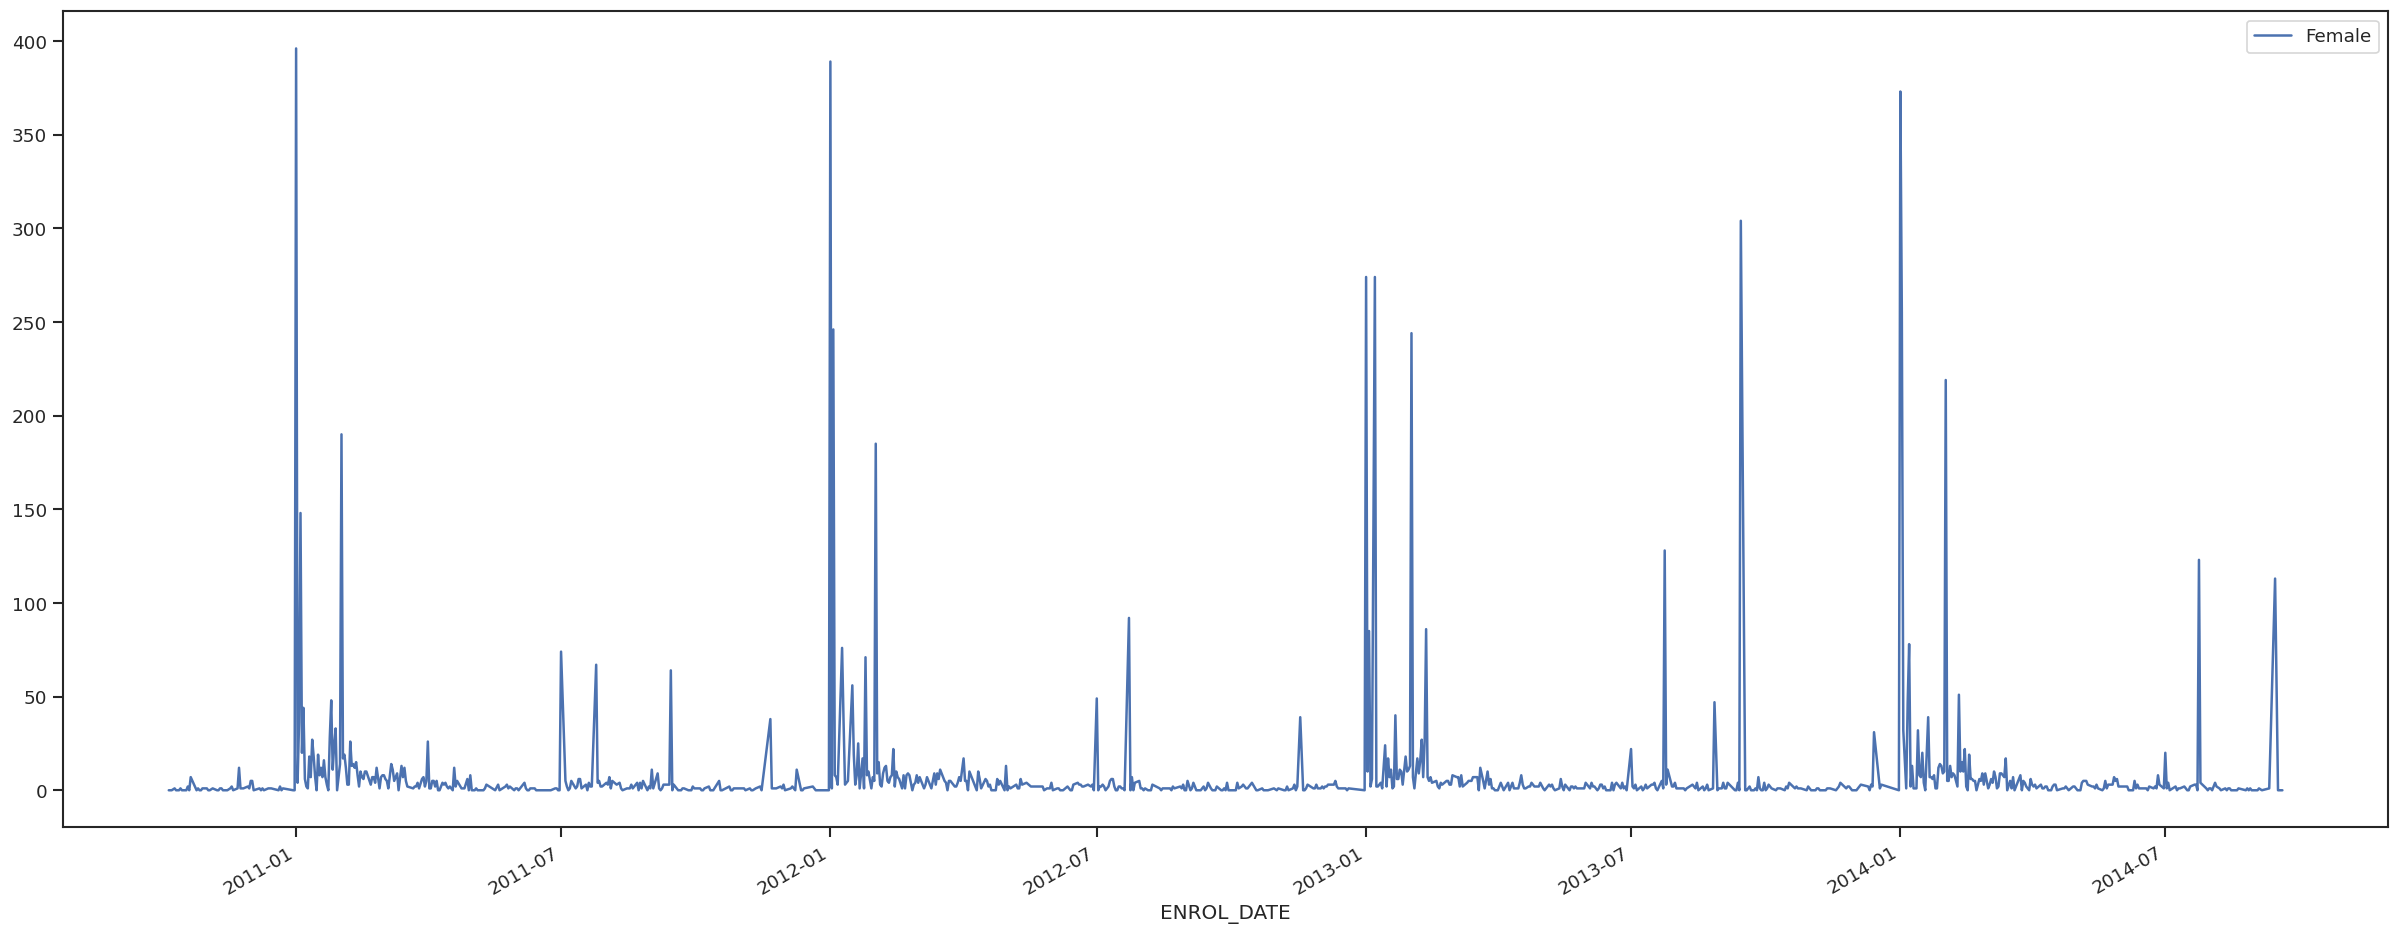

In [518]:
indexedDataset.plot(figsize=(25, 10))

In [519]:
#Determining Rolling Statistics
rolmean = indexedDataset.rolling(window=12).mean() 
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

              Female
ENROL_DATE          
2010-10-06       NaN
2010-10-08       NaN
2010-10-10       NaN
2010-10-11       NaN
2010-10-13       NaN
...              ...
2014-09-10  0.416667
2014-09-14  9.833333
2014-09-16  9.833333
2014-09-17  9.750000
2014-09-19  9.750000

[1006 rows x 1 columns]                Female
ENROL_DATE           
2010-10-06        NaN
2010-10-08        NaN
2010-10-10        NaN
2010-10-11        NaN
2010-10-13        NaN
...               ...
2014-09-10   0.514929
2014-09-14  32.492890
2014-09-16  32.492890
2014-09-17  32.518876
2014-09-19  32.518876

[1006 rows x 1 columns]


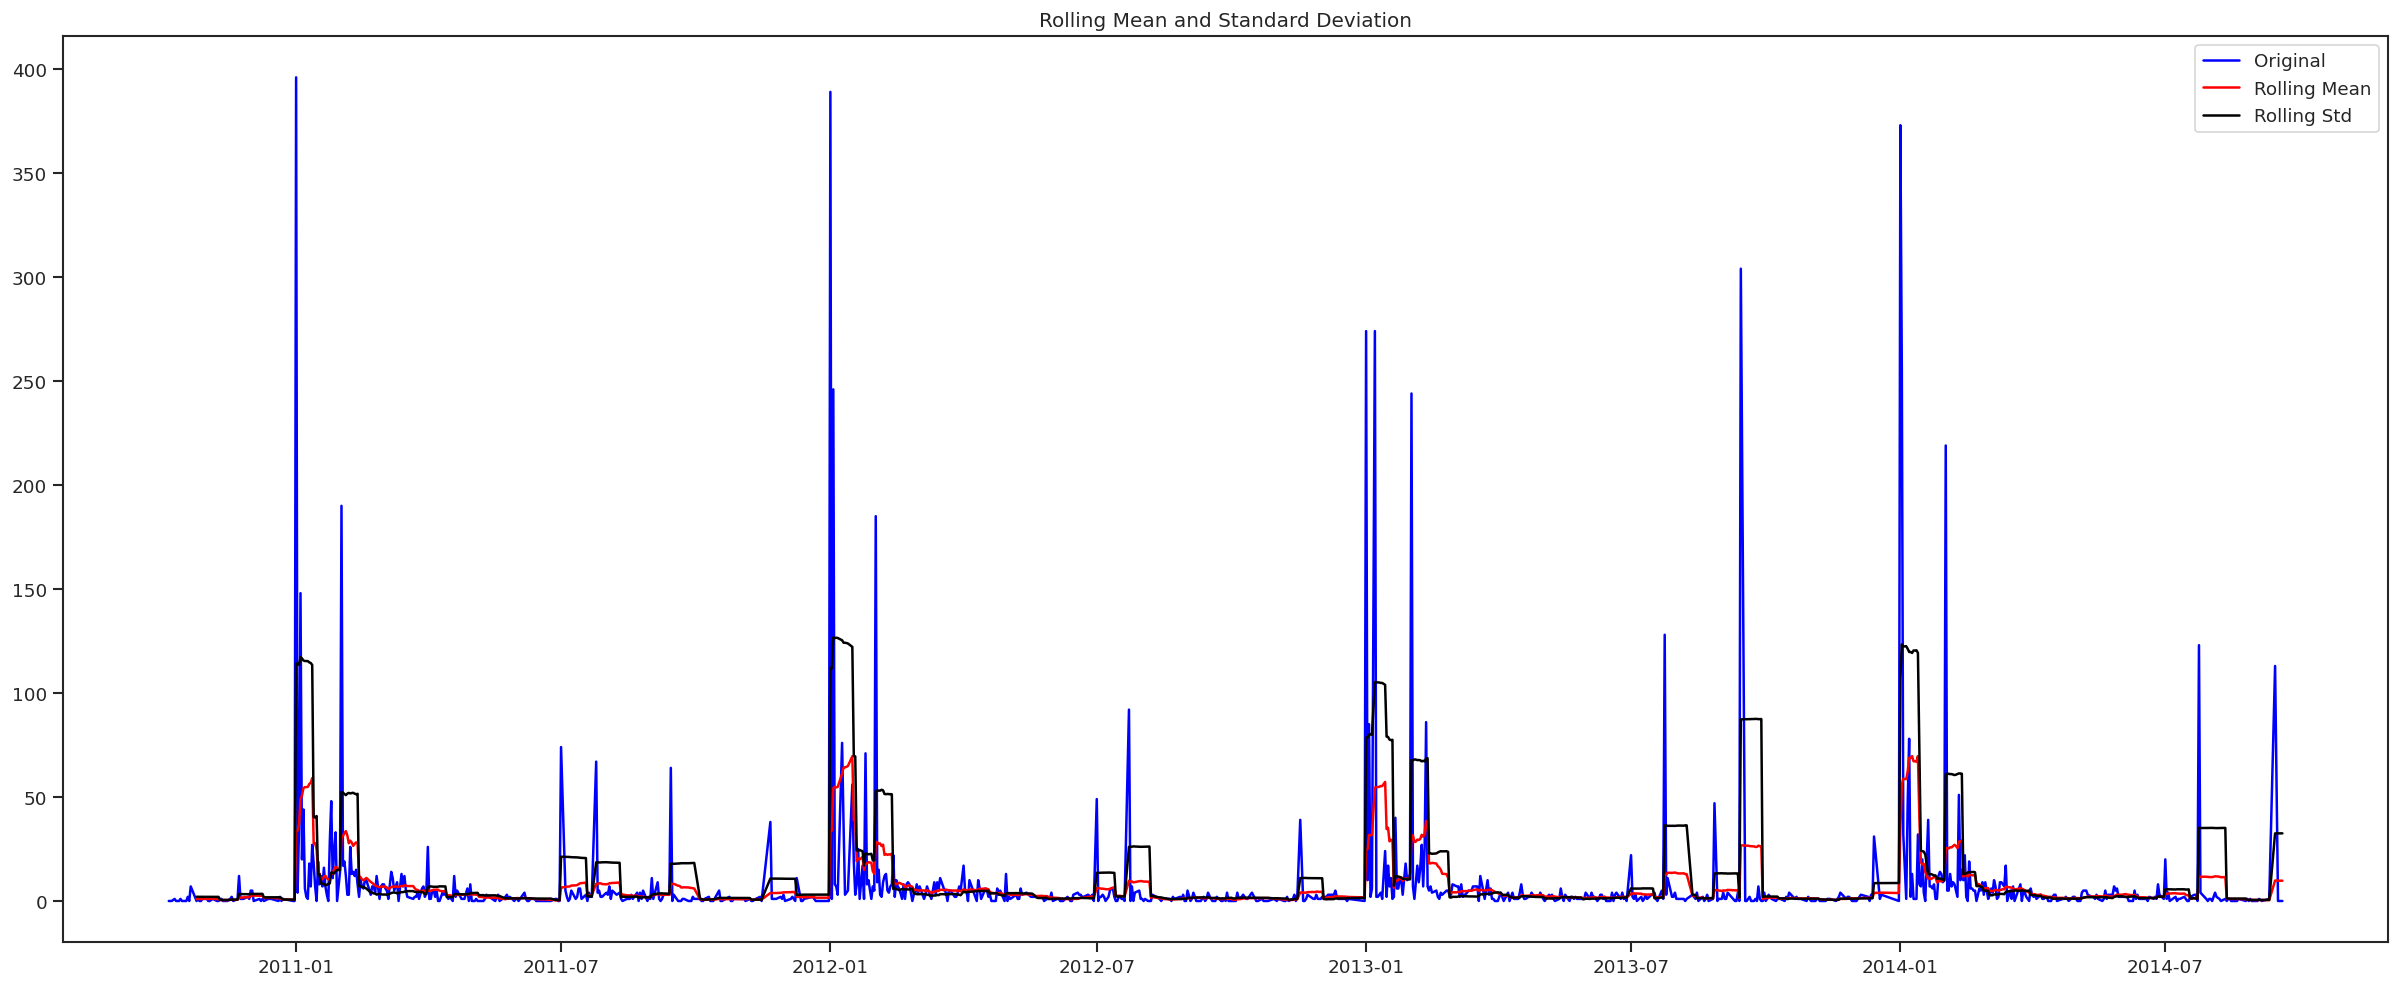

In [520]:
# ploting rolling statisics:
plt.figure(figsize=(25, 10))
orig = plt.plot(indexedDataset,color='blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)


In [521]:
#From the above graph we can see that our mean and variances is not constant 

### Performing Dickey Fuller Test

In [522]:

from statsmodels.tsa.stattools import adfuller
    
print('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['Female'],autolag='AIC')

dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.118192e+01
p-value                        2.488774e-20
#Lags Used                     4.000000e+00
Number of Observations Used    1.001000e+03
Critical Value (1%)           -3.436900e+00
Critical Value (5%)           -2.864432e+00
Critical Value (10%)          -2.568310e+00
dtype: float64


In [523]:
#p-value is less than 0.05,which implies that the probabilty f the null hypothesis being correct is less than  2.488774e-20. therefore we can reject the null meaning data is stationary
#Critical values are higher than T Statistic at 99%,95% and 90% confidence intervals

### Log Transformation to Ensure Data is Stationary

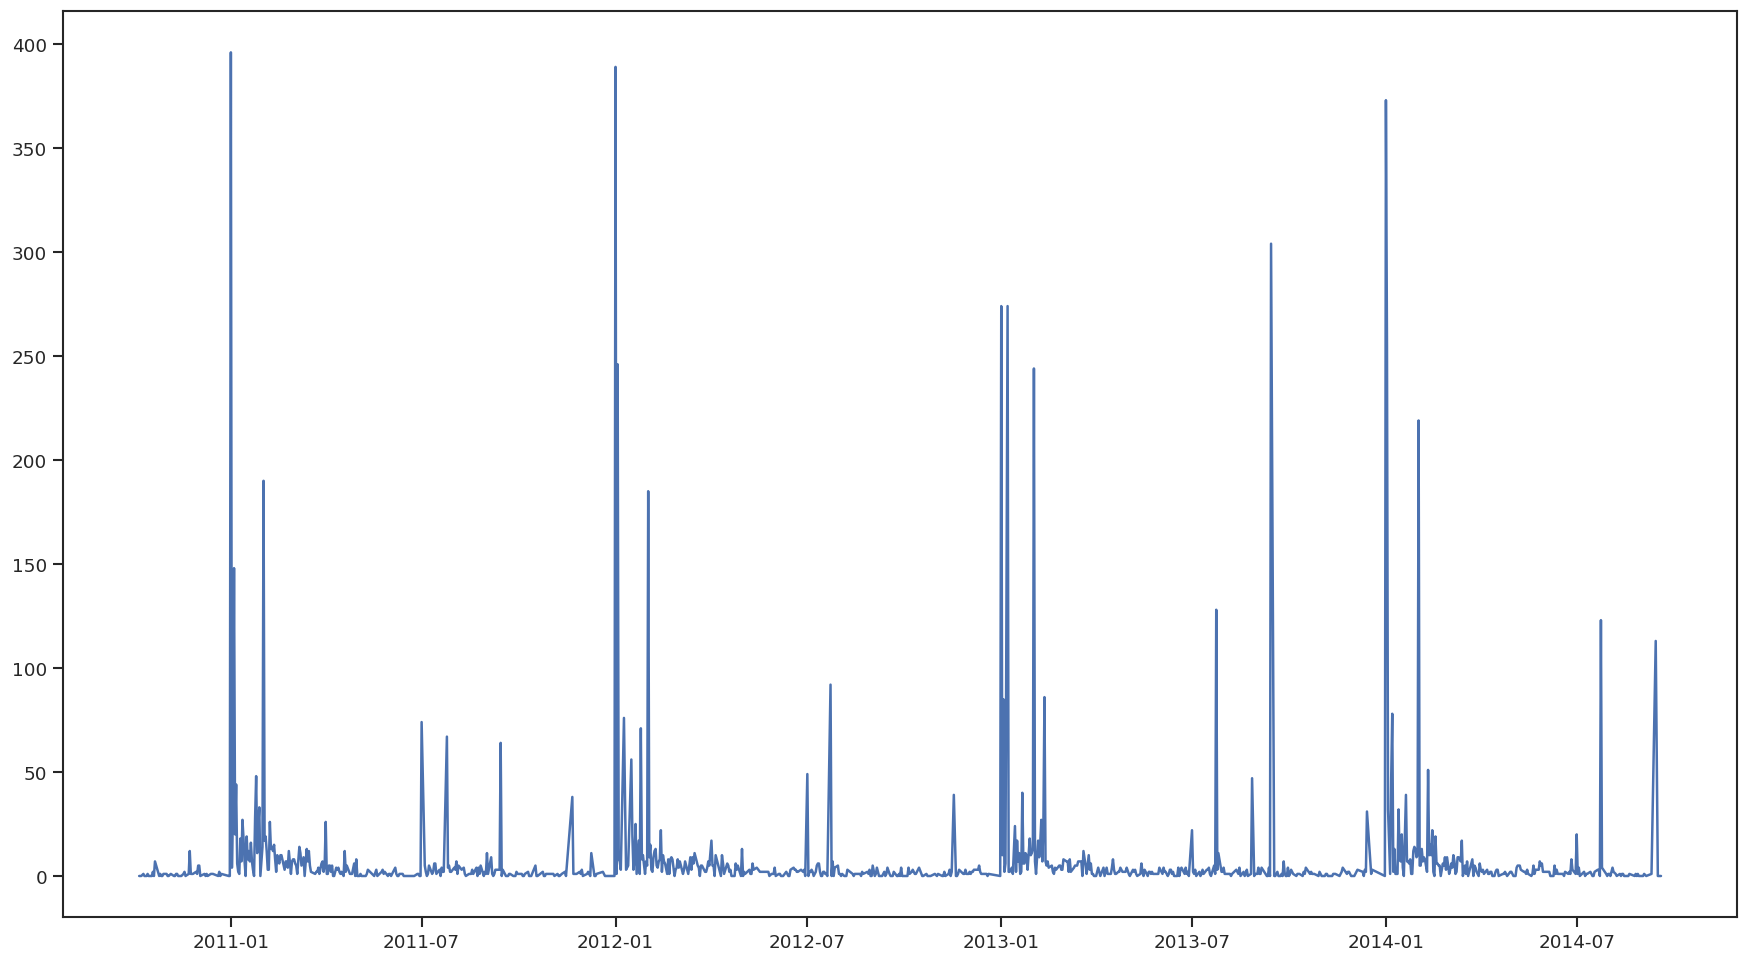

In [524]:
plt.figure(figsize=(18, 10))
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset)

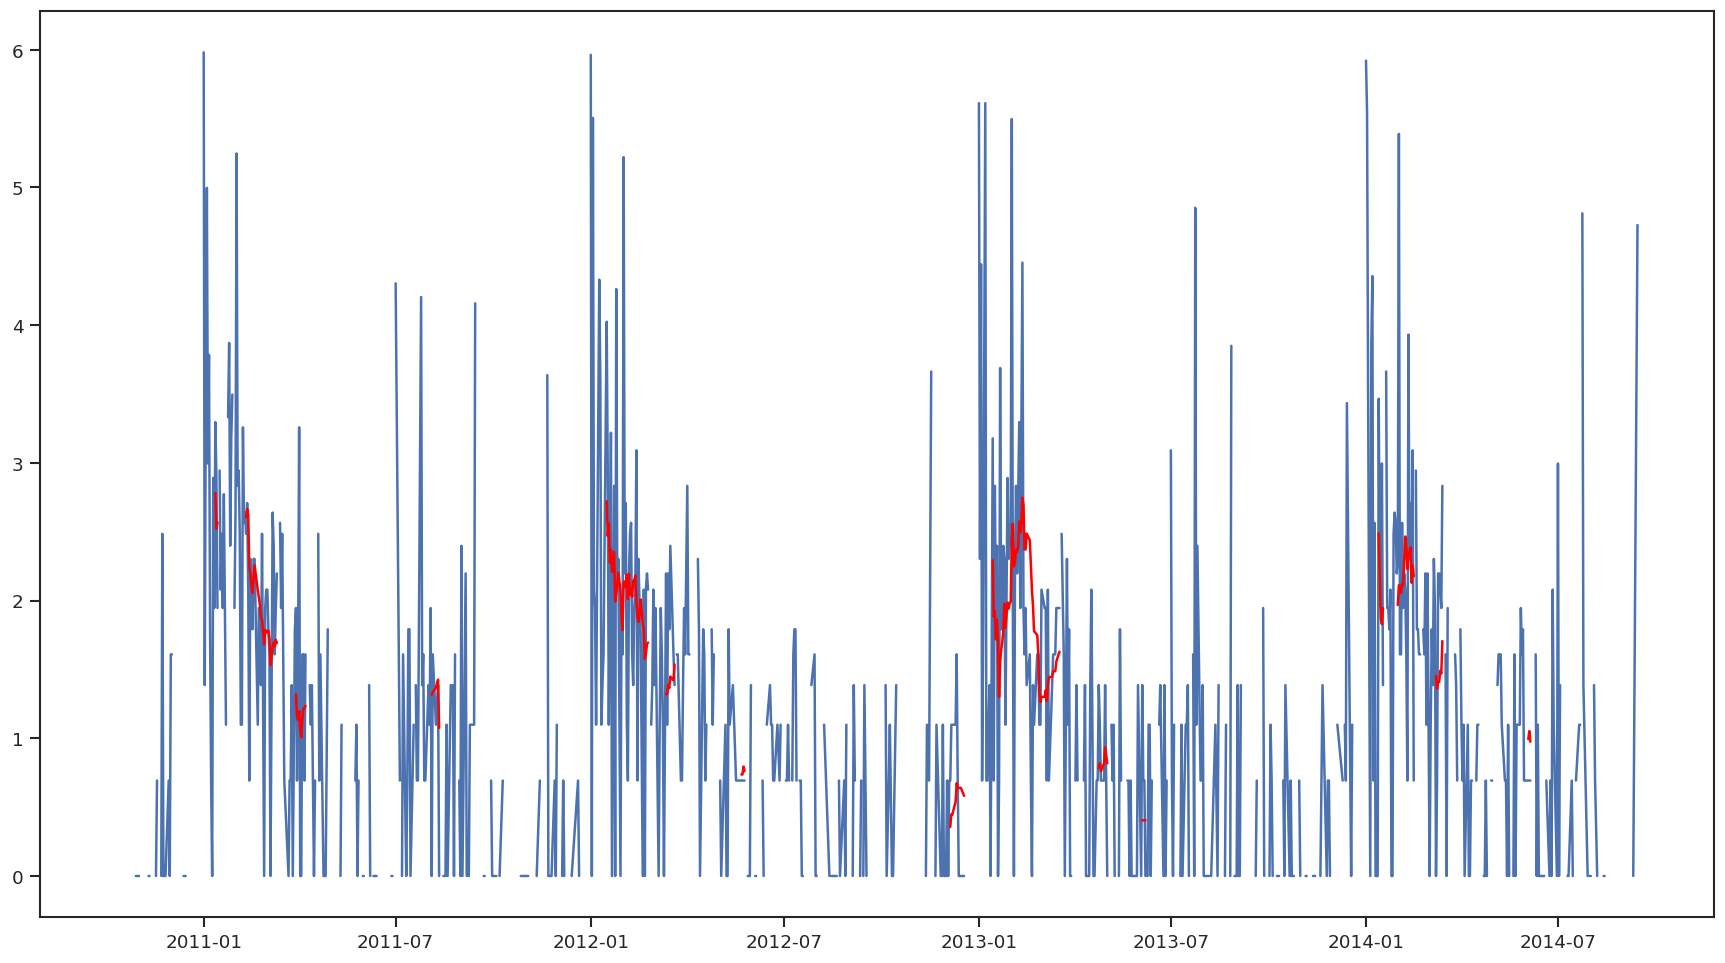

In [525]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.figure(figsize=(18, 10))
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [526]:
#We can conclude that mean is not stationary moving with the time

In [527]:
#Next we will get the difference between the moving Averages an dthe Actual Number of Females

In [528]:
#datasetLogScaleMinusMovingAverage = indexedDataset_logScale-movingAverage
#datasetLogScaleMinusMovingAverage.head()

#Removing Nan Value
#datasetLogScaleMinusMovingAverage.dropna(how="any", inplace=True)
#datasetLogScaleMinusMovingAverage = datasetLogScaleMinusMovingAverage.fillna("", inplace=False)

#datasetLogScaleMinusMovingAverage.head(10)


datasetMinusRolMean = indexedDataset- rolmean
datasetMinusRolMean.head()

#Removing Nan Value
datasetMinusRolMean.dropna(how="any", inplace=True)
datasetMinusRolMean = datasetMinusMovingAverage.fillna("", inplace=False)

datasetMinusRolMean.head(10)

Female
ENROL_DATE          
2010-10-25 -0.916667
2010-10-26  0.000000
2010-10-27 -1.000000
2010-10-28 -0.916667
2010-10-29  0.000000
2010-11-01 -0.083333
2010-11-02 -1.000000
2010-11-03 -1.000000
2010-11-05 -0.083333
2010-11-08 -0.916667

In [529]:
#Calculating the weighted Average of Time Series To See the Trend Present in the Time Series

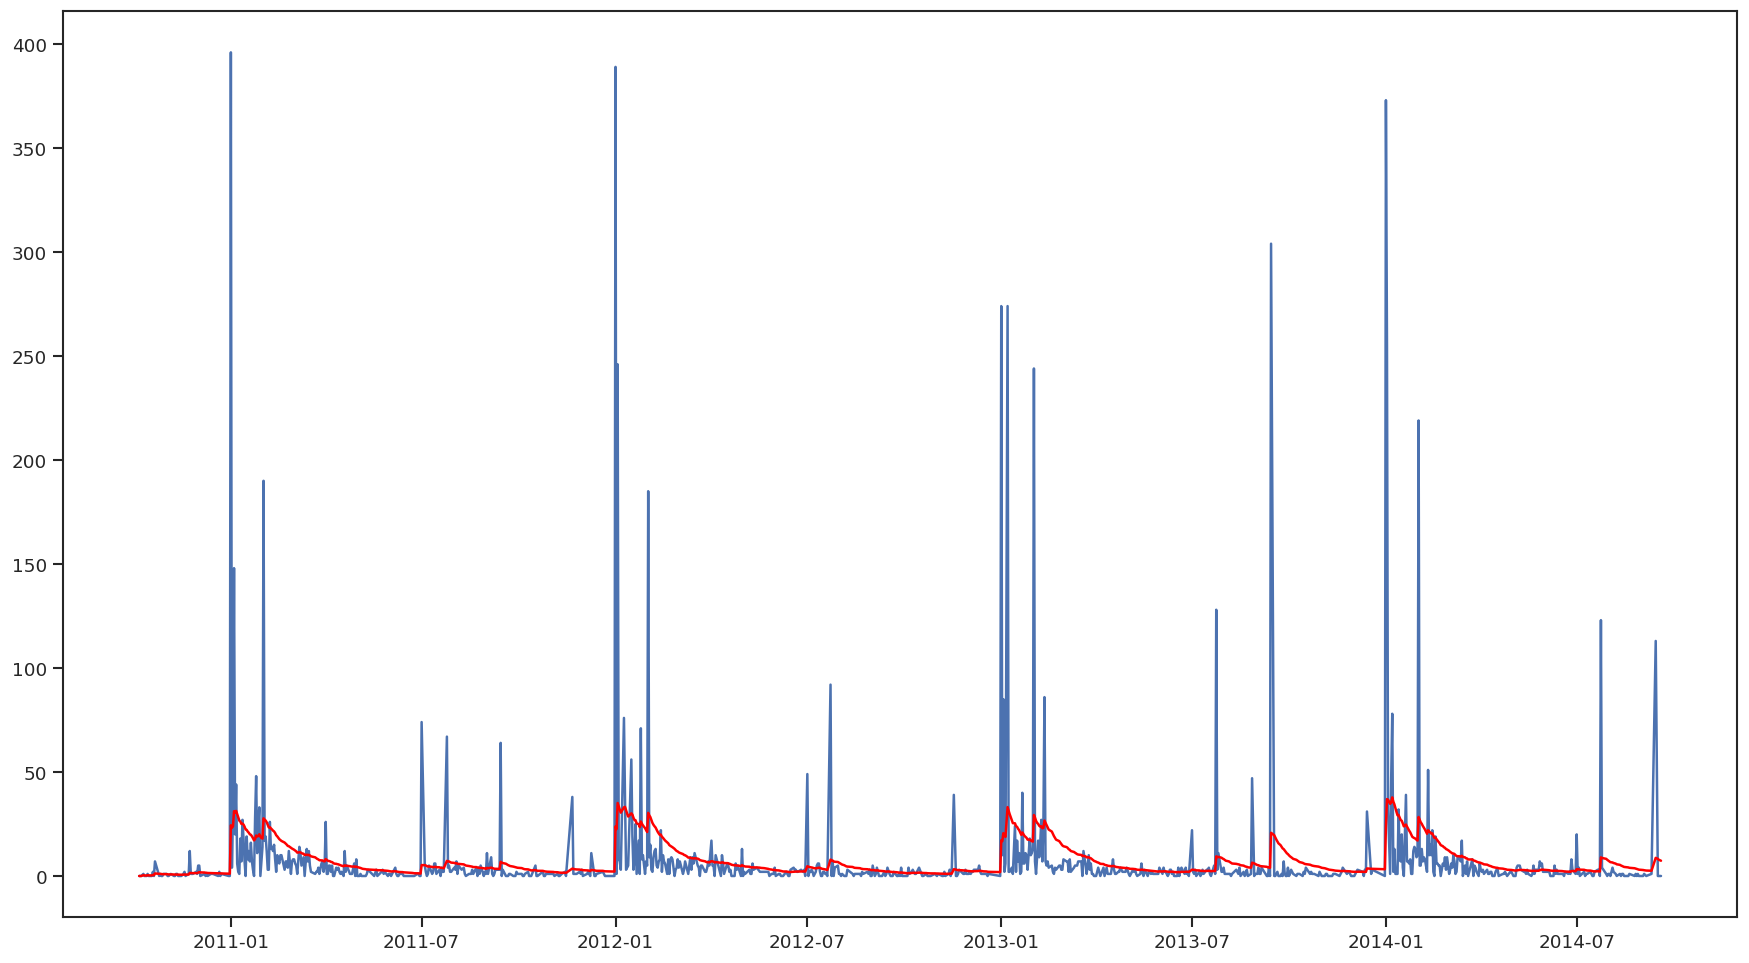

In [530]:
exponentialDecayWeightedAverage = indexedDataset.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.figure(figsize=(18, 10))
plt.plot(indexedDataset)
plt.plot(exponentialDecayWeightedAverage,color='red')

In [531]:
#Shift the values into the time series so we can use it in the forecasting

In [532]:
#datasetLogDiffShifting = indexedDataset - indexedDataset_logScale.shift()
#plt.figure(figsize=(18, 10))
#plt.plot(datasetLogDiffShifting)

In [533]:
#We have shift the values by 1

### Looking at components of Time Series

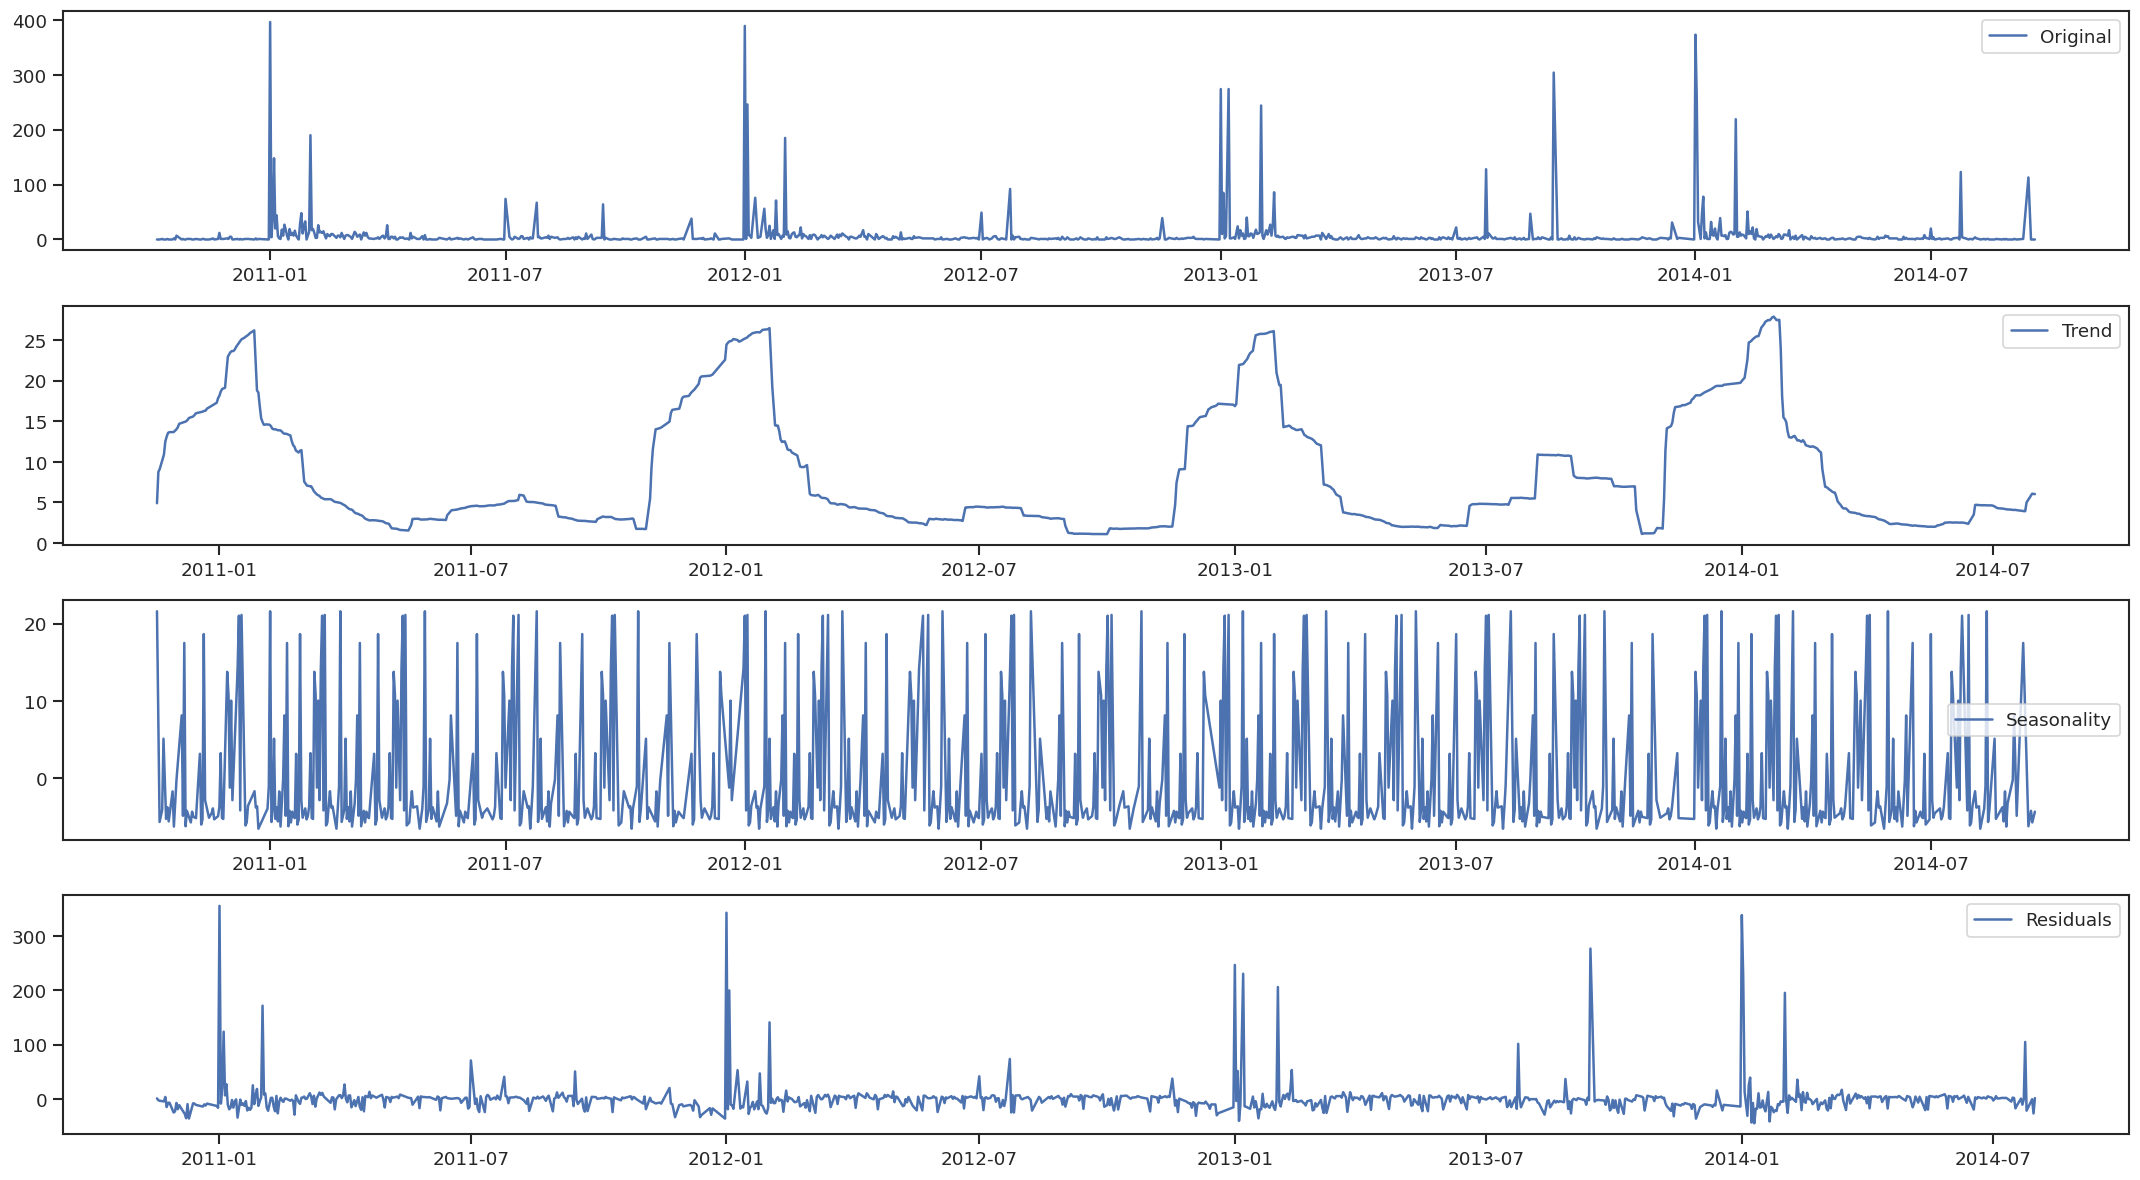

In [534]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDataset,period=52)


#decomposition = seasonal_decompose(indexedDataset_logScale)
#partions 3 components
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
#Plotting the graphs
plt.figure(figsize=(18, 10))
plt.subplot(411)
plt.plot(indexedDataset,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


decomposedData = residual
decomposedData.dropna(inplace=True)


In [535]:
#ACF and PACF plots:

In [537]:
#from statsmodels.tsa.stattools import acf,pacf

#lag_acf = acf(datasetLogDiffShifting,nlags=20)
#lag_pacf= pacf(datasetLogDiffShifting,nlags=20,method='ols')

#PLot ACF:
#plt.subplot(121)
#plt.plot(lag_acf)
#plt.axhline(y=o,linestyle='--',color='gray')
#plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
#plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
#plt.title('Autocorrelation Function')


fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(indexedDataset, lags=50, ax=axes[0])
plot_pacf(indexedDataset, lags=50, ax=axes[1])

#p value is where the graph cuts 0 for the first time Partial AutoCorrelation.

#q value is where the graph cuts 0 for the first time AutoCorrelation.

SyntaxError: unmatched ')' (<ipython-input-537-ffeddb0555f3>, line 16)